# Problem 1

## Summary
In (Manyika, Silberg, & Presten, 2019) human biases and their presence in AI systems are discussed. A few examples were provided such as:

* A British school used a computer program which result in discrimination against women and those with non-European names
* A criminal justice algorithm in Broward [County] Florida mislabeled African-American defendants as "high risk" at twise the rate as white defendants.
* NLP models trained on news articales can tend to exhibit gender stereotypes.

The artical also discussed how there are different wasy that biases can find themselves into algorithms. One was through the training data that the algorithm was develop with, such as the British school example where the algorithm had matched human performance with an accuracy of 90-95%. Another key source of bias was the way data was sampled for training, where certain groups may be over or underrepresented, such as when facial analysis technologies were found to have higher error rates for minorities and women of a minority. 

Some things that the researchers suggested is that we should take advantage of ways that AI can help people improve their tradtional deciion making. In particular one method they suggested was using a model to make a prediction or recommendation along side the human, and probe senstive variables included in the mdoel such as sex or race to help understand how that changes the outcome of the prediction or recommendation. This in particular is an advantage that they pointed out since while it may be difficult to or nearly impossible to interpret the coefficients of models such as large neural networks, but we can change input values and use other similar methods to understand how the prediction or recommendation changes; whereas, humans can lie about their decision making or not even realize they have a particular bias and are less transparent about how they came to the decision. In particular this methodology could be used to help out disadvantaged groups.

Another key point that the authors made is that where we can we need to collect metrics and try to quantify fairness of a model so that we can better understand the impacts of its use. Some ways that researches have quantified or defined fairness is a requirement that a model ahve an equal predictive value across groups or require that false positive/negative rates across the groups be similar. They do acknoledge that this can be a challend, and multiple fairness definitions often cannot be simultaneously met.

They also try to point out that not just AI researchers or data scientist implementing these kind of algorithms be aware of potential shortcomings or biases but management and business leaders also need to be away and try to stay up-to-date in this fast moving field. The management also needs to make sure they have responsible processes available to their teams to help make sure that bias is mitigated as much as possible, and some tech companies such as Google and IBM have published recommended practices or common tools that can be used.

## References

Manyika, J., Silberg, J., & Presten, B. (2019, October 25). What Do We Do About the Biases in AI? Retrieved from Harvard Business Review: https://hbr.org/2019/10/what-do-we-do-about-the-biases-in-ai



# Problem 2

In [1]:
from keras.datasets import cifar10
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import mlflow
import mlflow.keras

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
from sklearn.metrics import confusion_matrix


matplotlib.style.use('ggplot')

2024-04-25 19:26:14.341262: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(x_train_val, y_train_val), (x_test, y_test) = cifar10.load_data()

# split further into training and validation sets
n_train = 4_000
n_val = 1_000
x_train = x_train_val[:n_train]
x_val = x_train_val[n_train:n_train + n_val]
y_train = to_categorical(y_train_val[:n_train])
y_val = to_categorical(y_train_val[n_train:n_train + n_val])
y_test = to_categorical(y_test)


In [7]:
# Create my keras models
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.15))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.15))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.15))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/Users/rodneymurray/Library/CloudStorage/OneDrive-Colostate/Statistics Masters/Classes/STAA-578/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 550,570 (2.10 MB)

 Trainable params: 550,570 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Train the model
mlflow.keras.autolog()
callbacks = [
    EarlyStopping(
        monitor="val_loss", patience=10, mode="min", restore_best_weights=True
    ),
    ReduceLROnPlateau(patience=5, min_lr = 0.00001),
]
history = model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=callbacks,
)

2024/04/25 19:31:02 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '4ff339dc84924324aad1d94c2336506c', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current keras workflow


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 423ms/step - accuracy: 0.1066 - loss: 10.0293 - val_accuracy: 0.1770 - val_loss: 2.2264 - learning_rate: 5.0000e-04
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 466ms/step - accuracy: 0.2210 - loss: 2.1196 - val_accuracy: 0.3240 - val_loss: 1.8523 - learning_rate: 5.0000e-04
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 422ms/step - accuracy: 0.3630 - loss: 1.7472 - val_accuracy: 0.4020 - val_loss: 1.7045 - learning_rate: 5.0000e-04
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 403ms/step - accuracy: 0.4229 - loss: 1.6193 - val_accuracy: 0.4260 - val_loss: 1.6313 - learning_rate: 5.0000e-04
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 421ms/step - accuracy: 0.4472 - loss: 1.5362 - val_accuracy: 0.4000 - val_loss: 1.7011 - learning_rate: 5.0000e-04
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 410ms/step - accuracy: 0.4876 - loss: 1.4618 - val_accuracy: 0.4470 - val_loss: 1.5779 - learning_rate: 5.0000e-04
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 415ms/st

2024/04/25 19:37:48 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /var/folders/vq/2m5d1_vs2j52vgd15wch09fc0000gn/T/tmplo_j48vu/model, flavor: keras). Fall back to return ['keras==3.2.1']. Set logging level to DEBUG to see the full traceback. 


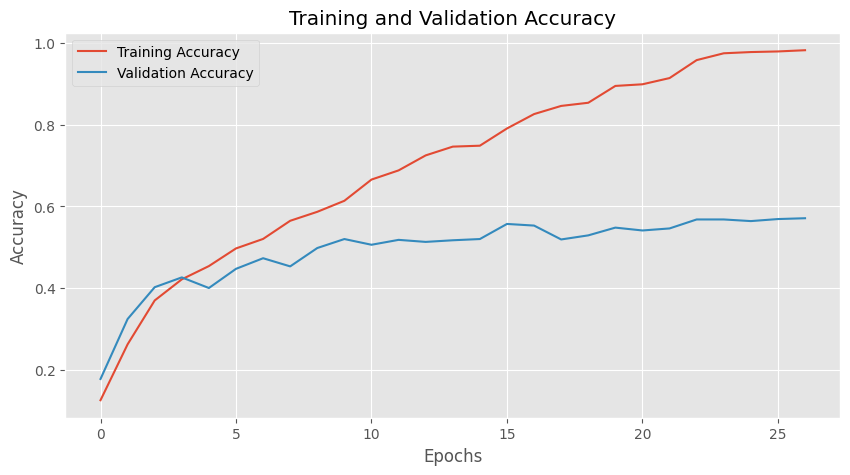

In [9]:

# Plot the training and validation loss curves
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

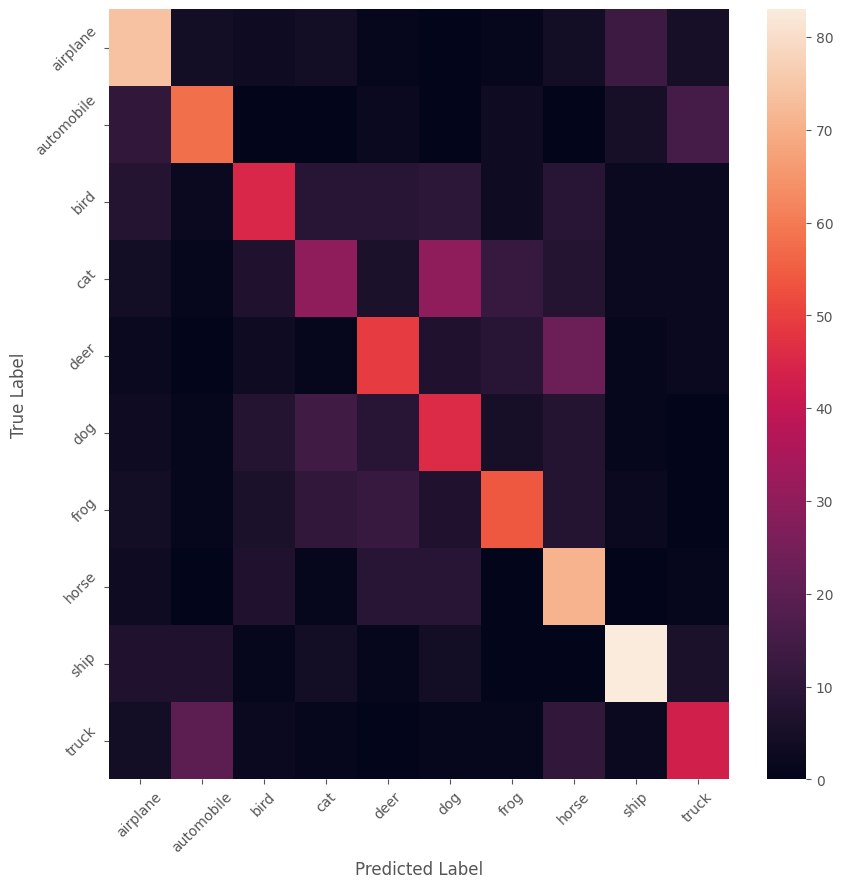

In [10]:

# Predict on validation data
y_pred = model.predict(x_val, verbose=False)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create confusion matrix and plot as a heatmap
cm = confusion_matrix(y_val_classes, y_pred_classes)

plt.figure(figsize=(10, 10))
sns.heatmap(cm)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=np.arange(10) + 0.5, labels=class_labels, rotation=45)
plt.yticks(ticks=np.arange(10) + 0.5, labels=class_labels, rotation=45)
plt.show()


I opted to train a model from scratch after seeing the number of layers in a model like VGG6 and the small size of outputs of deeper layers with the 32x32 images that we have available. With that said, one may be able to look at using some of the lower layers in the pretrained model. 

I had played around with a couple of different structures of layers between pooling layers, and found that adding a couple of Conv2D layers seemed to help after I had seen the structrue of the VGG16 model. I also found that adding some dropout seemed to help reduce the amount of overfitting that we see with in the plot of the training and validation accuracies.

If I plot the confusion matrix as a heat map, we can see that the model the observations correct more often than not. There are a couple of warm spots we see where the model is predicting something to be an automobile when it was areally a truck, a dog when it was really a cat, and a horse when it was really a deer. It would be beneficial to look at these images, but also understandable from knowing what these objects look like that the model would struggle with some of these classes which are quite similar in nature.